# Определение закономерностей успешности компьютерных игр

# Описание проекта 

«Стримчик» - интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Перед нами данные до 2016 года. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».



# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Ход выполнения проекта

Шаг 1. Откроем файл с данными и изучим общую информацию
 
Шаг 2. Подготовка данных
- Заменим названия столбцов (приведём к нижнему регистру)
- Преобразуем данные в нужные типы
- Обработаем пропуски при необходимости
- Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

Шаг 3. Исследовательский анализ данных

Найдем:
- Количество выпускаемых игр в разные годы
- Изменение продаж по платформам
- Платформы-лидеры по продажам
- Глобальные продажи игр в разбивке по платформам
- Влияние отзывов пользователей и критиков на продажи
- Общее распределение игр по жанрам

Шаг 4. Составление портрета пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5) для пользователей каждого региона и различия в долях продаж
- Самые популярные жанры (топ-5) для пользователей каждого региона и различия в долях продаж
- Влияние рейтинга ESRB на продажи в отдельном регионе

Шаг 5. Проверка гипотез
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Шаг 6. Вывод


### Загрузка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

In [2]:
# загрузим данные
games = pd.read_csv('/datasets/games.csv')

In [3]:
# выведем 10 первых и последних строк датафрейма 
display(games.head(10))
games.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [4]:
# выведем общую информацию о датафрейме 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


После выведения первых и последних строк датафрейма и общей информации о нём видно, что в некоторых столбцах есть значительные пропуски (например, в столбце 'Critic_Score', 'User_Score' или 'Rating'). Названия столбцов находятся не в нижнем регистре. Необходимо привести некоторые столбцы к другому типу данных (например, столбец 'Year_of_Release' и 'User_score').

### Предобработка данных

Для начала привёдем названия столбцов к нижнему регистру.

In [5]:
# привёдем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

In [6]:
# проверим изменения и выведем названия столбцов на экран
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Успешно привели названия столбцов к нижнему регистру. Теперь приведём столбцы к необходимым типам данных.\
Столбец 'user_score' имеет тип данных object, хотя должен передавать числовые значения. Посмотрим на столбец детальнее и выведем уникальные значения данного столбца.

In [7]:
# выведем уникальные значение столбца 'user_score' отсортируя по возрастанию
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В столбце помимо числовых значений оказались значения 'tbd' и nan. 

Подразумеваю, что 'tbd' означает 'to be determined', то есть данных о рейтинге нет.

Посмотрим для каких строк оно применяется.

In [8]:
# срез датафрейма по значениям 'tbd' в столбце 'user_score'
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Думаю, что значения 'tbd' в данном случае означают то же, что и nan. Заменим такие значения.

In [9]:
# заменим значения tbd на nan 
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [10]:
# выведем список уникальных значений для 'user_score' и проверим изменения
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

В столбце 'user_score' изменили 'tbd' на схожее по значению nan.

In [11]:
# изменим тип данных на float
games['user_score'] = games['user_score'].astype('float')

# проверим тип данных
games['user_score'].dtype

dtype('float64')

В связи с тем, что в столбце 'year_of_release' содержатся значения nan не удаётся перевести тип данных в int.\
 Таким образом перейдем к обработке пропусков, а затем вернемся к изменения типу данных данного столбца.

In [12]:
# количество пропусков
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пропуски содержатся в 6 столбцах - 'name', 'year_of_release', 'genre', 'critic_score', 'user_score' и 'rating'.

In [13]:
# процент пропущенных значений
games_missed_values_percent = (games.isna().sum()/len(games)).round(4) * 100

# выведем на экран
games_missed_values_percent

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         54.59
rating             40.48
dtype: float64

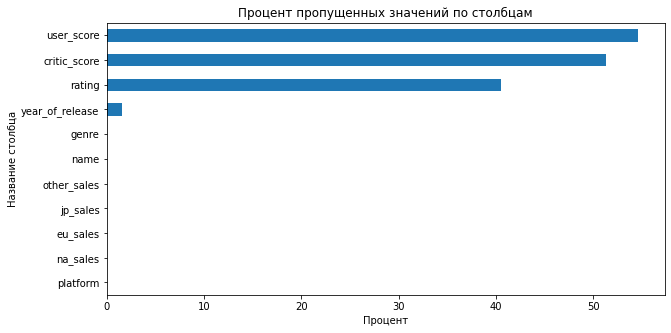

In [14]:
# визуализируем количесвто пропусков
games_missed_values_percent.sort_values().plot(kind = 'barh', figsize=(10,5))
plt.title('Процент пропущенных значений по столбцам')
plt.xlabel('Процент')
plt.ylabel('Название столбца')
plt.show()

Больше всего пропусков содержится в столбца 'user_score' - 54.59%, 'critic_score' - 51.32% и 'rating' - 40.48%. Гораздо меньше пропусков в столбце 'year_of_release' - 1.61% и всего по 0.1% пропусков в столбцах 'name' и 'genre'.

In [15]:
# строки с пропущенными значениями в 'name'
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце 'name' 2 пропущенных значения, но никаких данных кроме года выпуска и платформы практически нет, чтобы можно было корректно определить имя.

In [16]:
# посмотрим срез для игр 1993 года выпуска на платформе GEN 
games.query('year_of_release == 1993.0 and platform =="GEN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти же 2 строки дают пропуски по жанру.\
Удалим эти 2 строки, так как никакой информативности они не несут.

In [17]:
# удалим строки с пропущенными значениями в столбце 'name'
games.dropna(subset =['name'], inplace = True)

In [18]:
# проверим пропуски в 'name'
games['name'].isna().sum()

0

In [19]:
# удалим строки с пропущенными значениями в столбце 'year_of_release'
games.dropna(subset =['year_of_release'], inplace = True)

In [20]:
# проверим пропуски в 'year_of_release'
games['year_of_release'].isna().sum()

0

In [21]:
# проверим пропуски в 'genre'
games['genre'].isna().sum()

0

In [22]:
# приведём столбец к нужному формату
games['year_of_release'] = games['year_of_release'].astype('int')

In [23]:
# Проверим пропуски
display(games['year_of_release'].isna().sum())

# проверим тип данных
games['year_of_release'].dtype

0

dtype('int64')

In [24]:
# выведем список уникальных значений для 'critic_score'
games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [25]:
# выведем список уникальных значений для 'rating' 
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Самые большое пропуски для столбцов 'user_score', 'critic_score', 'rating', но обработать их релеватно сложно. Так как рейтинг и оценки пользователей и критиков не зависят от жанра, года выпуска, платформы или продаж. Так как от года к году могут быть "удачные" версии игр или "неудачные". Применение к ним средних или медианных величин может привести к нерелевантным результатам. Оставим пропуски как есть.

Проверим датафрейм на явные дубликаты

In [26]:
# сумма дубликатов
games.duplicated().sum()

0

In [27]:
# выведем список уникальных значений для 'genre' и проверим на неявные дубликаты
games['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [28]:
# выведем список уникальных значений для 'platform' и проверим на неявные дубликаты
games['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [29]:
# добавим столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [30]:
# выведем первые строки на экран
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [31]:
# проверим наличие пропусков
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

В результате предобработки данных были полностью обработаны пропуски в столбцах 'name', 'year_of_release' и 'genre'. Пропуски в столбцах 'critic_score', 'user_score' и 'rating' были решено оставить, так как заменить их на релевантные значения невозможно. Кроме того, в столбце 'user_score' было обработано значение 'tbd'. Столбцы 'year_of_release' и 'user_score' приведены к нужному типу данных. Столбцы датафрейма были проверены на явные и неявные дубликаты. Были посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец 'total_sales' датафрейма.

### Исследовательский анализ

3.1. Количество выпускаемых игр за год


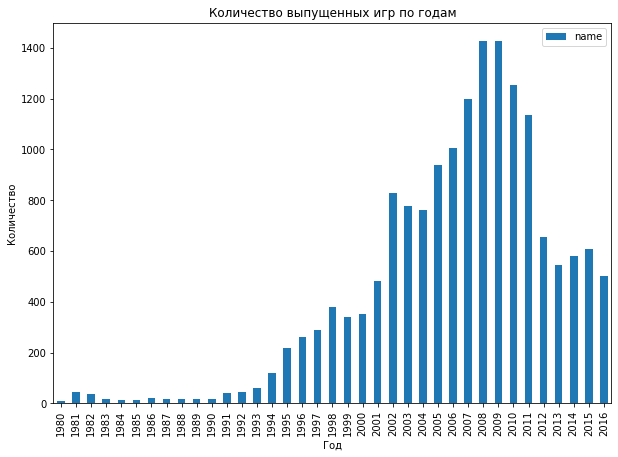

In [32]:
# визуализируем количество выпускаемых игр в разбивке по годам
games.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count').plot(kind = 'bar', figsize=(10,7))
plt.title('Количество выпущенных игр по годам')
plt.ylabel('Количество')
plt.xlabel('Год')
plt.show()

Исходя из графика видно, что с 1994 года начинается рост в количестве выпускаемых игр. Возможно, это связано с развитие компьютерных технологий, операционных систем и графики. Так, если в 1994 году выпускалось около 100 игр в год, то в 1998 году уже порядка 400, а в 2002 уже более 800. Так же виден резкий скачок в производстве за год с 2001 к 2002 году. Это год успеха PS2, выхода GameCube у Nintendo и Xbox у Microsoft. Пиковые значения выпуска игр достигаются в 2008-2009 года и с тех пор, вплоть до 2016 года убывают. Возможно, это связано с развитие мобильных технологий и мобильного гейминге.

3.2. Продажи по платформам

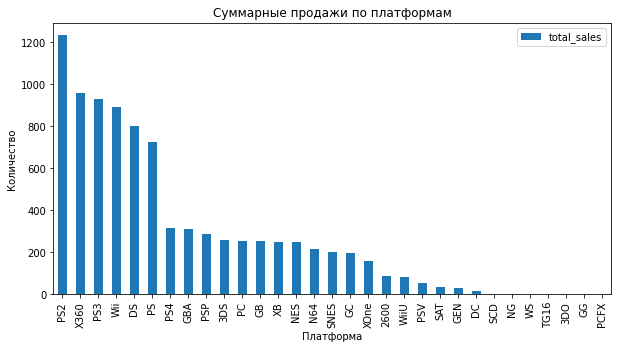

In [33]:
# визуализируем продажи по платформам
games.pivot_table(index='platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False).plot(
    kind = 'bar', figsize = (10,5)
)
plt.title('Суммарные продажи по платформам')
plt.ylabel('Количество')
plt.xlabel('Платформа')
plt.show()

Исходя из графика видно, что выделяются ТОП-6 платформ по наибольшему количеству продаж, это - PS2, X360, PS3, Wii, DS, PS.\
Составим для них график распределения и посмотрим, как менялись продажи по годам.



In [34]:
# составим таблицу для самых популярных платформ по продажам
top_6_platform = games.pivot_table(index='platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False).head(6)

# обновим индексы
top_6_platform = top_6_platform.reset_index()

# выведем на экран
top_6_platform

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


In [35]:
# напишем функцию которая будет возвращать таблицу по сумме общих продажах для нужных платформ по годам с 1994 года (роста выпуска игр)
def total_sale_per_year_platform(name,data):
    name_of_platform = data[(data['platform'] == name) & (data['year_of_release'] >1994)] 
    total_year = name_of_platform.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total_year
    

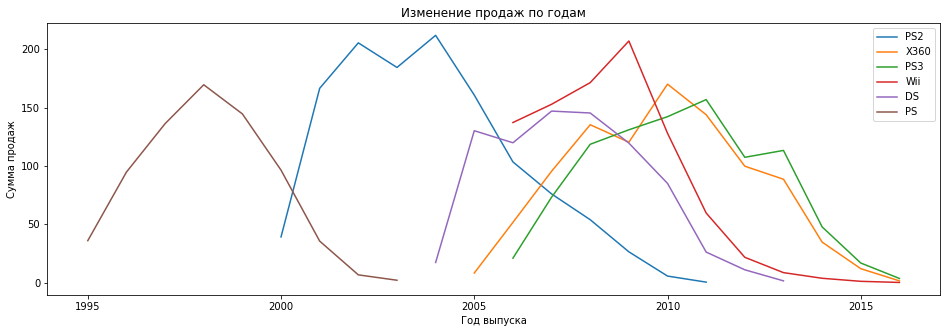

In [36]:
# визуализируем суммарные продажи по платформам по годам
plt.figure(figsize=(16,5))

# цикл визуализации для нужных платформ
for i in top_6_platform['platform']:
    sns.lineplot(data = total_sale_per_year_platform(i,games)['total_sales'], label=i)
    plt.ylabel('Сумма продаж')
    plt.xlabel('Год выпуска')
    plt.title('Изменение продаж по годам')
    plt.legend()


После построения графика мы видим, что в топ платформ по продажам попали платформы, некоторые из которых уже не выпускаются, так, например, 6 место заняла платформа PS, которая была супер популярна в конце 90-начале 2000 годов, но на смену её уже пришли новые модели, PS2, PS3 и PS4. За счёт высоких продаж в тот период, данная платформа всё еще в топе, но для построения прогноза на следующий год она будет бесполезна.

Имеет смысл сделать срез за актуальный период, который будет иметь влияние на выбор платформы для игр следующих годов.

Как видно из данных, платформа PS обновляет модель каждые 5 лет, а срок выпуска игр на платформы в общем в среднем равен 10 годам. Это характерно для многих платформ.

Можно заметить, что для выхода новых моделей платформ имеет место резкий рост продаж (в первые 3-5 лет), достижение пика и затем плавное снижение.

То есть если мы хотим взять актуальный период, который бы послужил фактором для построения прогноза на 2017 года,предлагаю взять период, за который платформы развиваются. Можно также учесть, что обновления таких платформ как, Sony (PS4) и Microsoft (Xbox One) произошли в 2013 году. **В качестве актуального периода возьмем период с 2013 года (4 года).**\
(данные на декабрь 2016 года за 2016 год могут быть неполными).

Снова сделаем срез и проанализируем продажи по актуальным годам, так как брать в расчёт платформы имеющие успех в 90-е годы, или начале 00-х не будет иметь смысла на 2017 год.




In [37]:
# срез по датафрему для игр выпущенных с 2013 года
games_2013 = games.query('year_of_release > 2013')

# выведем на экран
games_2013

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


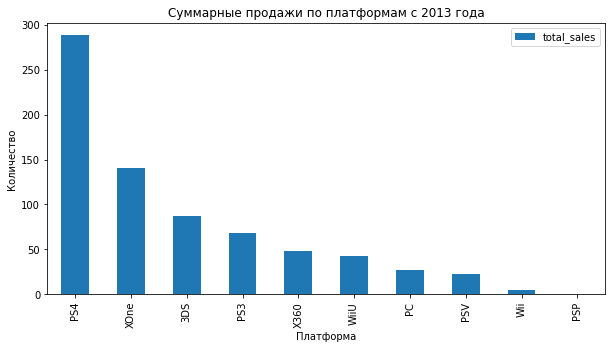

In [38]:
# проделаем всё то же самое, только теперь для одновленного датафрейма
# визуализируем продажи по платформам
games_2013.pivot_table(index='platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))
plt.title('Суммарные продажи по платформам c 2013 года')
plt.ylabel('Количество')
plt.xlabel('Платформа')
plt.show()

Для игр выпущенных с 2013 года наиболее популярной оказалась платформа PS4 (288 млн. продаж) с 2x кратным преимуществом от второго места - XOne (140 млн. продаж). Затем следует 3DS (86 млн.), PS3 (68 млн.), X360 (48 млн.), WiiU (43 млн.), PC (27 млн.), PSV (22 млн.), Wii (5млн.) и PSP (0.36 млн.)

In [39]:
# составим таблицу для самых популярных платформ по продажам
top_actual = games_2013.pivot_table(index='platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False)

# обновим индексы
top_actual = top_actual.reset_index().rename_axis(None, axis=1)

# выведем на экран
top_actual

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


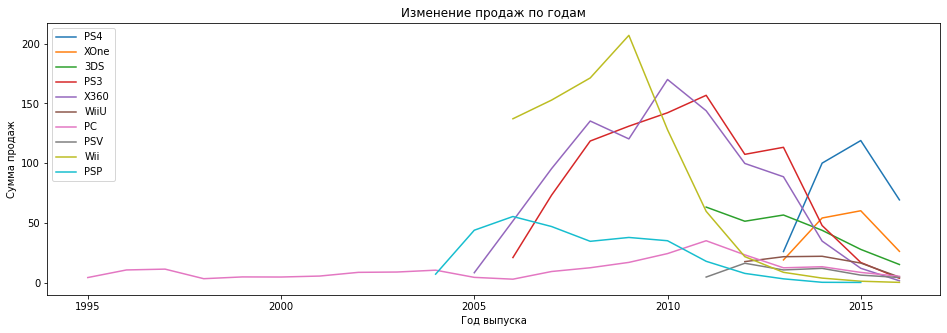

In [40]:
# визуализируем суммарные продажи по платформам по годам
plt.figure(figsize=(16,5))

# цикл визуализации для нужных платформ
for i in top_actual['platform']:
    sns.lineplot(data = total_sale_per_year_platform(i,games)['total_sales'], label=i)
    plt.ylabel('Сумма продаж')
    plt.xlabel('Год выпуска')
    plt.title('Изменение продаж по годам')
    plt.legend()


На графике видна общая тенденция к снижению продаж к 2016 году. Видно, что за последние 3 года в лидеры по продажам выбились PS4 и XOne, пришедшие на замену своим "старшим братьям" PS3 и X360. Такая закономерность наблюдается для большинства новых моделей - рост числа суммарных продаж игр в первые года выпуска. Тем не менее и они уже вышли к общей тенденции снижения продаж к 2016 году. Стабильнее всего показывает себя PC из года в год показывая приблизительно одинаковые результаты.

In [41]:
# возьмем топ-8 платформ с 2013 года
top_8_actual = top_actual.head(8)

# выведем на экран
top_8_actual

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40


In [42]:
# датафрейм для выбранных платформ
games_top_8_platform_actual = games.query('platform in ["PS4","XOne","3DS","PS3","X360", "WiiU", "PC","PSV"]')

# выведем первые 10 строк
games_top_8_platform_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47


In [43]:
# посмотрим на описание данных по общим продажам для выбранных платформ 
games_top_8_platform_actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60
PC,957.0,0.267252,0.679745,0.01,0.02,0.05,0.1700,8.01
PS3,1306.0,0.713124,1.403065,0.00,0.11,0.28,0.7600,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
PSV,429.0,0.125431,0.212341,0.01,0.02,0.05,0.1300,1.96
WiiU,147.0,0.559116,1.058836,0.01,0.08,0.22,0.5250,7.09
X360,1232.0,0.780227,1.632122,0.01,0.11,0.28,0.7700,21.82
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


3.3 «Ящик с усами» по глобальным продажам игр в разбивке по платформам

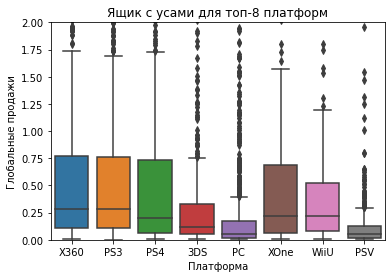

In [44]:
# визуализируем «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure()
sns.boxplot(data=games_top_8_platform_actual, x='platform', y='total_sales')
plt.ylim([0,2])
plt.title('Ящик с усами для топ-8 платформ')
plt.ylabel('Глобальные продажи')
plt.xlabel('Платформа')
plt.show()

Пределы "ящиков" лежат в диапазоне 0.02 до 0.76 млн. "Ящики" для X360 и PS3 очень похожи, как схожи и PS4 с XOne. Это конкурирующие между собой модели для характерных годов. То есть это говорит о том, что платформы остаются друг относительно друга примерно на тех же позициях, а каждая новая модель платформы показывает примерно те же данные, что и предыдущая. 'Аутсайдерами' на этом фоне выглядят платформы PC и PSV. У них низкие значения как низа ящика, так и верха.

3.4. Влияние отзывов пользователей и критиков на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы (выберем X360) отзывы пользователей и критиков.

In [45]:
# срез данных для платформы X360
x_360 = games.query('platform == "X360"')

# выведем на экран
x_360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16622,World Snooker Championship 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16647,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01


In [46]:
# данные по платформе X360 с оценкой пользователей больше 0
x_360_user = x_360.query('user_score > 0')

# выведем таблицу на экран
x_360_user

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16311,Banjo-Kazooie,X360,2008,Platform,0.00,0.01,0.00,0.00,77.0,8.2,E,0.01
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
16460,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


In [47]:
# найдем корреляцию между оценкой пользователя и глобальными продажами
x_360_user['user_score'].corr(x_360_user['total_sales'])

0.11418661214018049

Зависимости между оценкой пользователя и глобальными продажами практически нет

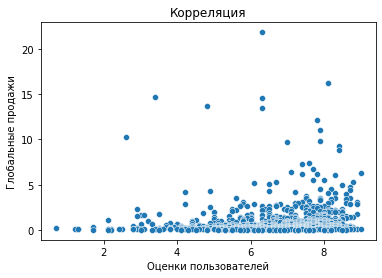

In [48]:
# визуализируем корреляцию между оценкой пользователя и глобальными продажами
plt.figure()
sns.scatterplot(data=x_360_user, x='user_score', y='total_sales')
plt.title('Корреляция')
plt.ylabel('Глобальные продажи')
plt.xlabel('Оценки пользователей')
plt.show()

In [49]:
# данные по платформе X360 с оценкой критиков больше 0
x_360_critic = x_360.query('critic_score > 0')

# выведем на экран
x_360_critic

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
15743,Worms,X360,2007,Strategy,0.00,0.02,0.00,0.00,75.0,6.9,E10+,0.02
16311,Banjo-Kazooie,X360,2008,Platform,0.00,0.01,0.00,0.00,77.0,8.2,E,0.01
16474,John Daly's ProStroke Golf,X360,2010,Sports,0.01,0.00,0.00,0.00,57.0,NaN,E,0.01
16550,Superstars V8 Racing,X360,2009,Racing,0.00,0.01,0.00,0.00,62.0,NaN,E,0.01


In [50]:
# найдем корреляцию между оценкой критиков и глобальными продажами
x_360['critic_score'].corr(x_360['total_sales'])

0.39286589254006954

Корреляция между оценкой критиков и глобальными продажами равна 0.39 - умеренно положительная.

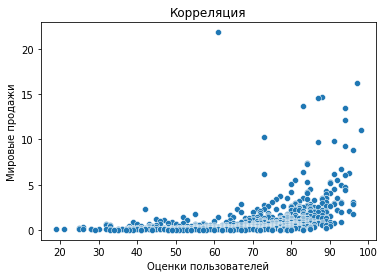

In [51]:
# визуализируем корреляцию между оценкой критиков и глобальными продажами
plt.figure()
sns.scatterplot(data=x_360, x='critic_score', y='total_sales')
plt.title('Корреляция')
plt.ylabel('Мировые продажи')
plt.xlabel('Оценки пользователей')
plt.show()

По результатам исследования корреляции глобальных продаж от оценок пользователей и критиков внутри одной платформы (X360) можно сказать, что корреляция с оценкой критиков выше, чем с оценкой пользователей. То есть сумма общих продаж игр гораздо больше зависит от оценки критиков, чем от оценки пользователей.

Посмотрим на ситуацию с другими платформами. Подтвердится ли данная зависимость и для других популярных платформ.

In [52]:
# сделаем срез для топ-8 популярных платформ с оценкой пользователей и критиков выше 0
games_top_8_platform_actual_score = games_top_8_platform_actual.query('user_score > 0 and critic_score > 0')

# выведем на экран
games_top_8_platform_actual_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


In [53]:
def scatter (name):
    platform = games_top_8_platform_actual_score[games_top_8_platform_actual_score['platform'] == name]
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    sns.scatterplot(data = platform, x='user_score', y = 'total_sales', ax = ax[0])
    sns.scatterplot(data = platform, x='critic_score', y = 'total_sales', ax = ax[1])
    ax[0].set(xlabel='Оценка пользователей')
    ax[0].set(ylabel='Глобальные продажи')
    ax[1].set(xlabel='Оценка критиков')
    ax[1].set(ylabel='Глобальные продажи')
    fig.suptitle(name)
    plt.show()
    
    user_cor = platform['user_score'].corr(platform['total_sales'])
    critic_cor = platform['critic_score'].corr(platform['total_sales'])
    
    print('Корреляция продаж с оценками пользователей', name.upper(), ':', user_cor)
    print('Корреляция продаж с оценками критиков', name.upper(), ':', critic_cor)


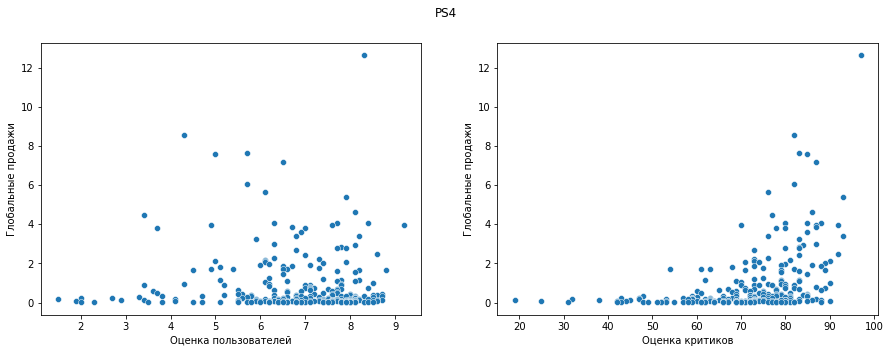

Корреляция продаж с оценками пользователей PS4 : -0.03362497596528878
Корреляция продаж с оценками критиков PS4 : 0.40589480145836687


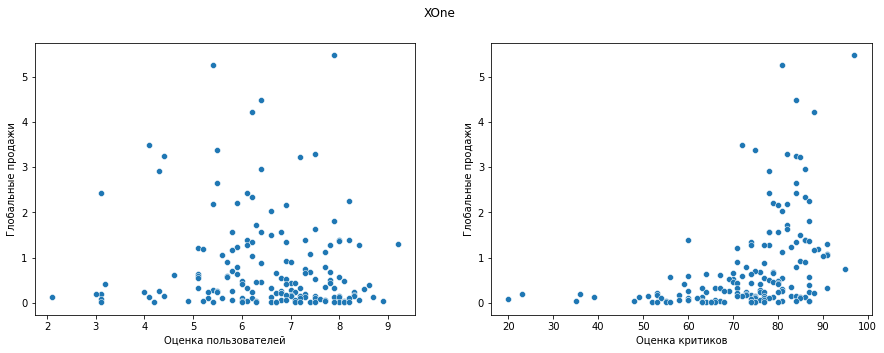

Корреляция продаж с оценками пользователей XONE : -0.09400318326920852
Корреляция продаж с оценками критиков XONE : 0.41042203561296375


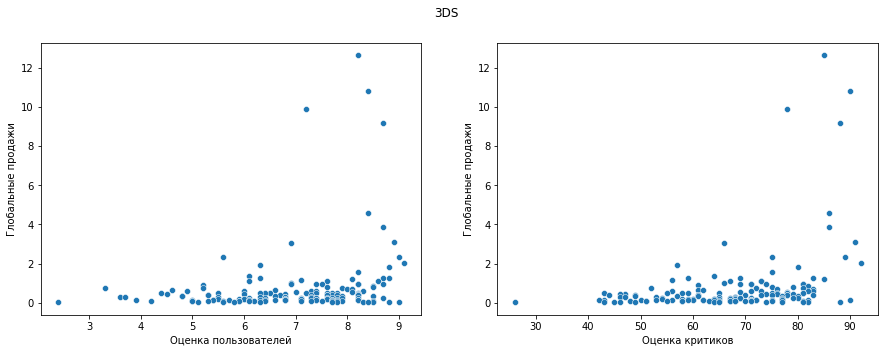

Корреляция продаж с оценками пользователей 3DS : 0.23208872237663558
Корреляция продаж с оценками критиков 3DS : 0.33890386446332155


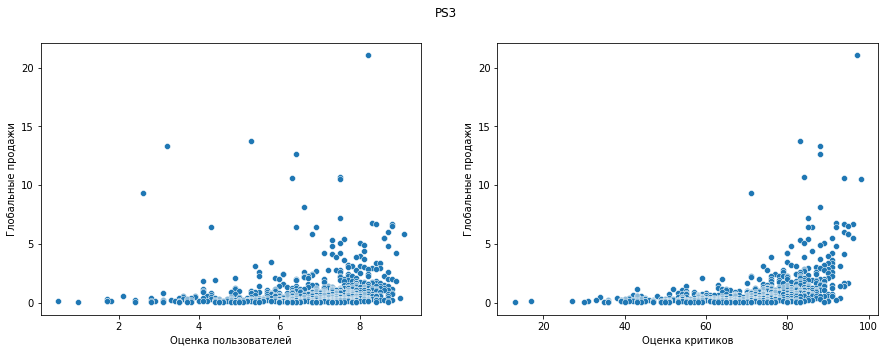

Корреляция продаж с оценками пользователей PS3 : 0.14397783125701577
Корреляция продаж с оценками критиков PS3 : 0.4282129041298839


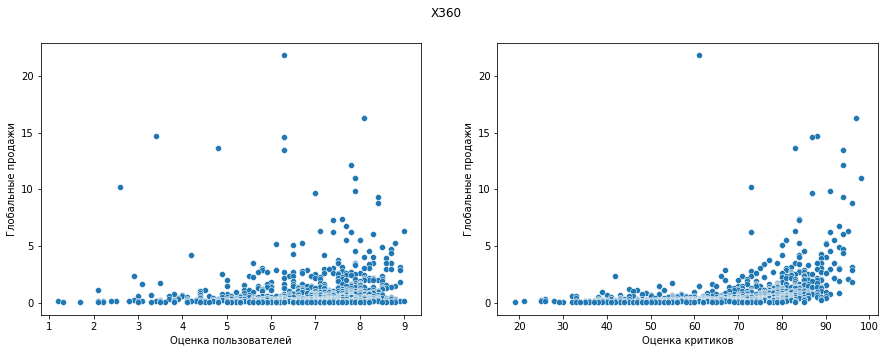

Корреляция продаж с оценками пользователей X360 : 0.11027967172869044
Корреляция продаж с оценками критиков X360 : 0.3889921155786245


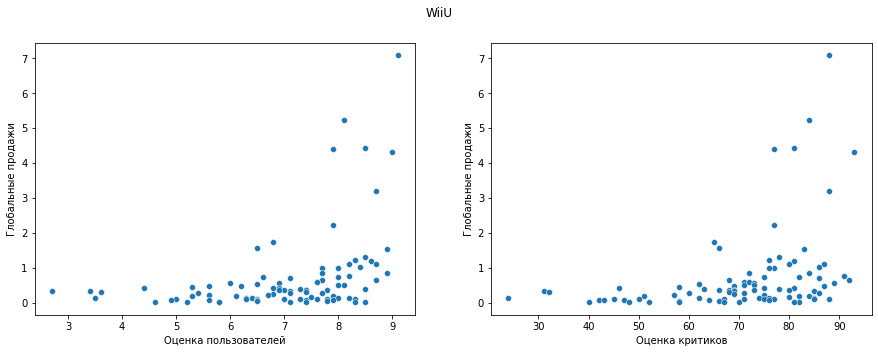

Корреляция продаж с оценками пользователей WIIU : 0.3918479505297129
Корреляция продаж с оценками критиков WIIU : 0.350882422488643


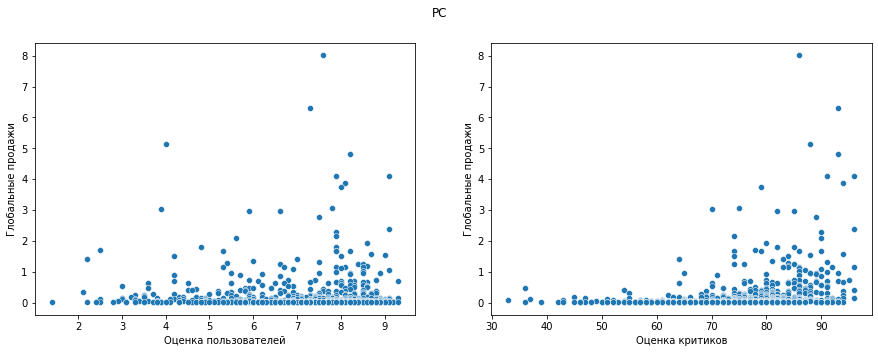

Корреляция продаж с оценками пользователей PC : 0.0035962323378451056
Корреляция продаж с оценками критиков PC : 0.257260981042733


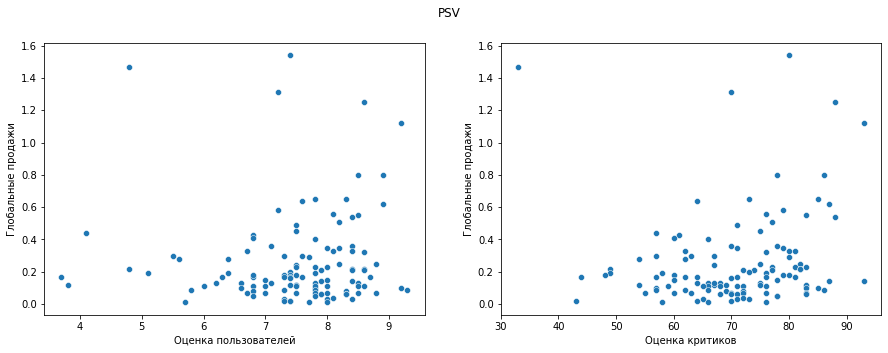

Корреляция продаж с оценками пользователей PSV : 0.038379762442551535
Корреляция продаж с оценками критиков PSV : 0.13161921121004788


In [54]:
for i in top_8_actual['platform']:
    scatter(i)

Для каждой из 8 популярных платформ подтверждается такая зависимость, что зависимость глобальных продаж от оценки критиков гораздо выше, чем от оценки пользователей. Тем не менее, в общем, корреляция глобальных продаж от оценки критиков в среднем является умеренной, а от оценки пользователей слабой.( хотя становится очевидно, что оценка критиков является весомее).

3.5. Общее распределение игр по жанрам

In [55]:
# выведем численность жанров в порядке убывания
games_2013['genre'].value_counts()


Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

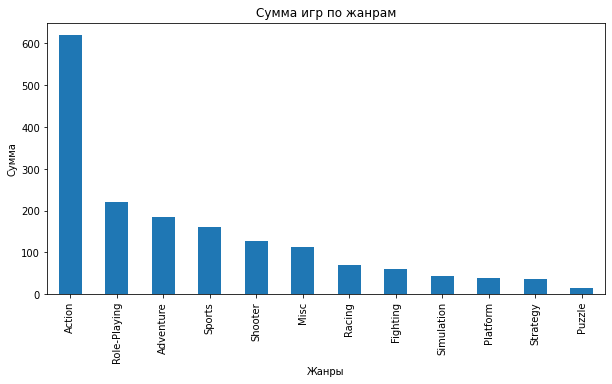

In [56]:
# визуализируем численность игр в зависимости от жанра 
games_2013['genre'].value_counts().plot(kind='bar', figsize = (10,5))
plt.title('Сумма игр по жанрам')
plt.ylabel('Сумма')
plt.xlabel('Жанры')
plt.show()

In [57]:
# сделаем сводную таблицу для жанров отсортированную по убыванию глобальных продаж
genre_sales = games_2013.pivot_table(index = 'genre', values='total_sales', aggfunc ='sum').sort_values(by='total_sales', ascending = False)

# обновим индексы
genre_sales.reset_index()


,genre,total_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


Больше всего игр с большим отрывом в жанре Action - 620, самым "непопулярным" является жанр Puzzle - всего 14 игр. 

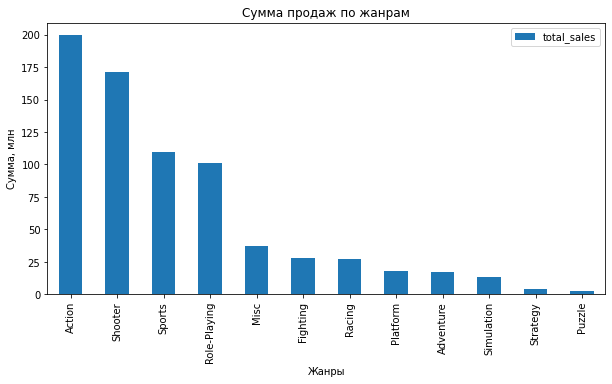

In [58]:
# визуализируем распределение глобальных продаж в зависимости от жанра 
genre_sales.plot(kind='bar', figsize = (10,5))
plt.title('Сумма продаж по жанрам')
plt.ylabel('Сумма, млн')
plt.xlabel('Жанры')
plt.show()

In [59]:
# сделаем сводную таблицу для средних продаж различных жанров
genre_mean = games_2013.pivot_table(index = 'genre', values='total_sales', aggfunc = 'mean').sort_values(by='total_sales', ascending = False)

# обновим индексы
genre_mean.reset_index()


,genre,total_sales
0,Shooter,1.335469
1,Sports,0.680000
2,Platform,0.476053
3,Fighting,0.470333
4,Role-Playing,0.459005
5,Racing,0.398841
6,Misc,0.332301
7,Action,0.322068
8,Simulation,0.298409
9,Puzzle,0.157857


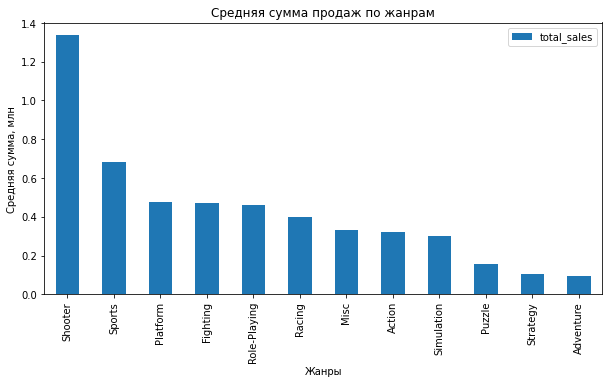

In [60]:
# визуализируем распределение средних глобальных продаж в зависимости от жанра 
genre_mean.plot(kind='bar', figsize = (10,5))
plt.title('Средняя сумма продаж по жанрам')
plt.ylabel('Средняя сумма, млн')
plt.xlabel('Жанры')
plt.show()

Исходя из таблиц распределения глобальной выручки по жанрам выделяются 4 жанра, которые также можно разделить на 2 группа. 1 группа - лидирующая, это Action (199.7 млн. продаж) и Shooter (170.9 млн.продаж). 2 группа - догоняющая лидеров, это Sports(109.5 млн.) и Role-Playing (101.4 млн.). Последние места по продажам занимают Strategy (3.9 млн.) и Puzzle(2.2 млн.).

Тем не менее можно заметить, что несмотря на огромное преимущесто в выпущенных играх по жанру Action (на 399 игр больше от второго места, и на 492 больше от жанра Shooter) и отрывом в 29 млн. по сумме глобальных продаж от ближайшего преследователя(Shooter), жанр Shooter обладает самый высокой (и значительно выделяется на фоне других жанров) суммой средних продаж на единицу товара (1 игру) - это может говорить о том, что в данном жанре есть Бестселлеры.

### Портрет пользователя каждого региона

Так как результаты исследования могут послужить фактором для прогноза в последующий год, неправильно сформированный портрет пользователя может привести к неправильным выводам, поэтому также возьмем данные за актуальный период, определенный в предыдущей главе (последние 4 года).

In [61]:
# напишем функцию для построения сводных таблиц топ-5 самых популярных платформ, жанров и рейтингов ESRB 
# и их визуализации
def portrait(column, title):
    fig, (axes1,axes2,axes3) = plt.subplots(1, 3, figsize=(15,5))
    for i, ax in zip(games_2013[['platform','genre','rating']], (axes1,axes2,axes3)):
        table = games_2013.pivot_table(index= i , values = column, aggfunc = 'sum').sort_values(by=column, ascending = False).reset_index().head(5)
        display(table)
        sns.barplot(data=table, x = i, y=column, ax=ax).set(ylabel= 'Сумма продаж')
        axes1.set_xlabel('Платформа')
        axes2.set_xlabel('Жанр')
        axes3.set_xlabel('Рейтинг')
        fig.suptitle(title)

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


,rating,na_sales
0,M,96.42
1,E,50.74
2,T,38.95
3,E10+,33.23


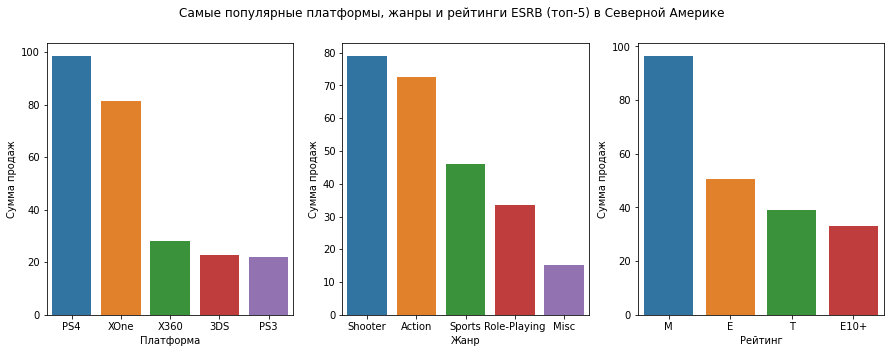

In [62]:
# портрет пользователя в Северной Америке
portrait('na_sales', 'Самые популярные платформы, жанры и рейтинги ESRB (топ-5) в Северной Америке')

Лидирующими платформами для Северной Америки является PS4 и XOne. У PS4(98.6 млн. продаж) и опережает своего конкурента 17 млн. Другие 3 платформы рейтинга имеют сопоставимые результаты между собой и значительно отстают от лидером X360 (28.3 млн.), 3DS (22.6 млн.) и PS3 (22 млн.). Самым популярным жанром является Shooter 79 млн. продаж, на втором месте ACtion (72 млн.) и затем следуют Sports, Role-Playing и Misc. Рейтинг по рейтингу ESRB представлен 4 жанрами - М (17+) - 96.4 млн, на втором месте практически в 2 раза меньше у E (для всех) - 50 млн, потом T (39 млн.) и Е10+ (33 млн.). 

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


,rating,eu_sales
0,M,93.44
1,E,58.06
2,T,34.07
3,E10+,26.16


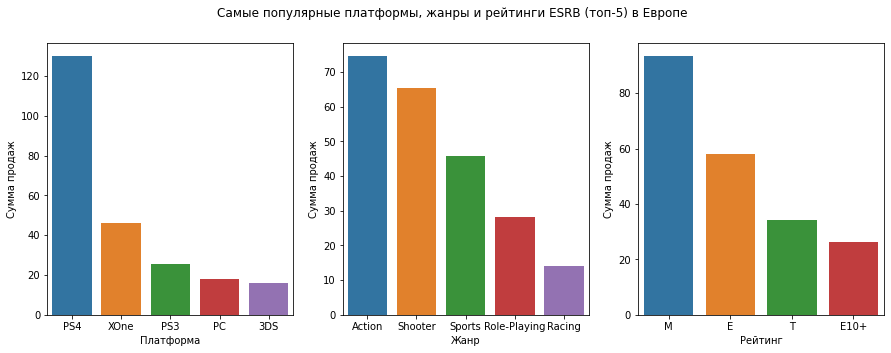

In [63]:
# портрет пользователя в Европе
portrait('eu_sales', 'Самые популярные платформы, жанры и рейтинги ESRB (топ-5) в Европе')

В Европе с значительным перевесом по продажам, является PS4 (130 млн. продаж) - это практически в 3 раза больше, чем у XOne, у которого 46 млн.продаж занимающего 2 место. 3 место у PS3 (25 млн.). По сравнению с рейтингом Северной Америки, в топ-5 вошла платформа PC, располагающаяся на 4 месте с 18 млн. продаж. 5 место у 3DS. 1 и 2 место между собой вновь, как и в Северной Америки, поделили между собой Action и Shooter, только в Европе более лидером стал Action (75 млн.) продаж, а 2 место у Shooter (65.5 млн.). Затем следует жанр Sports, Role-Playing, 5 место у Racing. Рейтинг ESRB схож с рейтингом в Северной Америки - M, E,T, E10+ в порядке убывания.

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


,rating,jp_sales
0,T,14.78
1,E,8.94
2,M,8.01
3,E10+,4.46


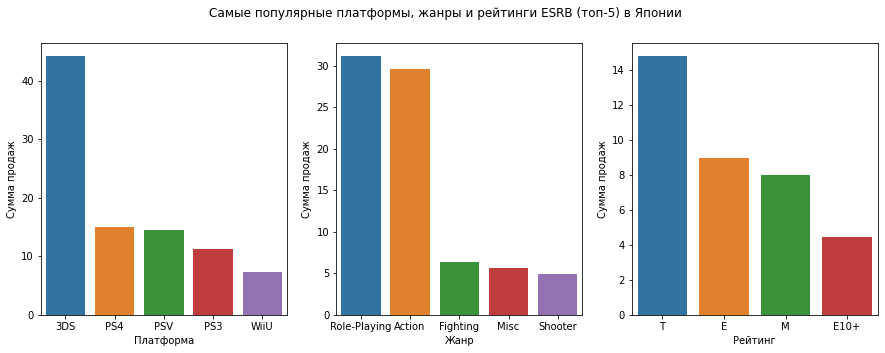

In [64]:
# портрет пользователя в Японии
portrait('jp_sales', 'Самые популярные платформы, жанры и рейтинги ESRB (топ-5) в Японии')

Совсем другая картина наблюдается для Японии. Из рейтинга самых популярных платформ выпала XOne. 1 место с значительным перевесом занимает 3DS - 44 млн. продаж (является местных произвлдителем, возможно, отсюда и лидерство в рейтинге). 2 и 3 место у PS4 и PSV, 15 и 14 млн. продаж, соответсвенно. Так же впервые в рейтинг популярных платформ попала WiiU - 7.3 млн. продаж.
В рейтинге жанров в Японии с Action конкурирует Role-Playing, который обгоняет по продажам Action на 1.5 млн, имея в активе 31 млн. продаж. А вот столь популярный в Европе и Северной Америке жанр Shooter занимает лишь 5 место со 4.87 млн. продаж. Стоит также отметить вхождение жанра Fighting в топ-5. Есть изменения и в рейтингах ESRB. Первое место занимает T (Подрости) с 14.8 млн. продаж, а категория Е (для всех) расположилась на втором месте (8.94 млн.), чуть опережая M (для всех,17+) - 8млн. То есть можно сказать, что в Японии категория играющих подростков опережает взрослую.

### Проверка гипотез


5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [65]:
# сформируем датафрейм для игр на платформе Xbox One и с наличием пользовательского рейтинга
xbox = games_2013.query('platform == "XOne" and user_score > 0')

# выведем первые 5 строк таблицы на экран 
xbox.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [66]:
# выделим из датафрейма пользовательские оценки
xbox_user_score = xbox['user_score']

In [67]:
# повтроим то же самое для игр на PC
# сформируем датафрейм для игр на платформе Xbox One и с наличием пользовательского рейтинга
pc = games_2013.query('platform == "PC" and user_score > 0')

# выведем первые 5 строк таблицы на экран 
pc.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2303,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
2784,Dragon Age: Inquisition,PC,2014,Role-Playing,0.33,0.34,0.0,0.06,85.0,5.9,M,0.73


In [68]:
# выделим из датафрейма пользовательские оценки
pc_user_score = pc['user_score']

Cформируем нулевую и альтернативную гипотезы

Нулевая гипотеза:\
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые\
H0: xbox_user_score = pc_user_score

Алтернативная гипотеза:\
Средние пользовательские рейтинги платформ Xbox One и PC разные\
H1: xbox_user_score != pc_user_score

Для проверки гипотез будем применять метод ttest_ind(), так как выборки независимы.

In [69]:
# уровень статистической значимости
alpha = 0.05

# проводим ttest
results = st.ttest_ind(xbox_user_score, pc_user_score)

# выведем результат
print(results.pvalue)

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
# выведем среднее время для наглядности
print('Средние пользовательские рейтинги Xbox One:', xbox_user_score.mean())
print('Средние пользовательские рейтинги PC:', pc_user_score.mean())

0.10450507919348415
Не получилось отвергнуть нулевую гипотезу
Средние пользовательские рейтинги Xbox One: 6.594545454545456
Средние пользовательские рейтинги PC: 6.298360655737705


В результате проведения ttest'а не удалось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги для Xbox One = 6.59, а для PC = 6.13.

5.2. Средние пользовательские рейтинги жанров Action и Sports разные.

In [70]:
# сформируем датафрейм для игр жанра Action и с наличием пользовательского рейтинга
action = games_2013.query('genre == "Action" and user_score > 0')

# выведем первые 5 строк таблицы на экран 
action.head(5)



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
304,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96


In [71]:
# выделим из датафрейма пользовательские оценки
action_user_score = action['user_score']

In [72]:
# сформируем датафрейм для игр жанра Sports и с наличием пользовательского рейтинга
sports = games_2013.query('genre == "Sports" and user_score > 0')

# выведем первые 5 строк таблицы на экран 
sports.head(5)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87


In [73]:
# выделим из датафрейма пользовательские оценки
sports_user_score = sports['user_score']

Cформируем нулевую и альтернативную гипотезы

Нулевая гипотеза:\
Средние пользовательские рейтинги жанров Action и Sports одинаковые\
H0: action_user_score = sports_user_score

Алтернативная гипотеза:\
Средние пользовательские рейтинги жанров Action и Sports разные\
H1: action_user_score != sports_user_score

Для проверки гипотез будем применять метод ttest_ind(), так как выборки независимы.

In [74]:
# уровень статистической значимости
alpha = 0.05

# проводим ttest
results = st.ttest_ind(action_user_score, sports_user_score)

# выведем результат
print(results.pvalue)

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
# выведем среднее время для наглядности
print('Средние пользовательские рейтинги жанра Action:', action_user_score.mean())
print('Средние пользовательские рейтинги жанра Sports:', sports_user_score.mean())

2.8711147985105864e-19
Отвергаем нулевую гипотезу
Средние пользовательские рейтинги жанра Action: 6.760606060606061
Средние пользовательские рейтинги жанра Sports: 5.2251968503937


В результате проведения ttest'а отвергаем нулевую гипотезу. Средние пользовательские рейтинги для жанра Action = 6.76, а для Sports = 5.22.

### Вывод

**В результате проведенного анализа о продажах игр было выявлено**:

- С 1994 года начинается рост в количестве выпускаемых игр. Так, если в 1994 году выпускалось около 100 игр в год, то в 1998 году уже порядка 400, а в 2002 уже более 800. Максимальных значений по выпуску игр в год достигается в 2008-2009 годах и затем  из года в год, вплоть до 2016 года, убывает


- Самыми популярными платформами являются - PS4, XOne, 3DS, PS3, X360 и WiiU. Так за последние 4 года было продано более 288 млн. игр на PS4, более 140 млн. на XOne и 86 млн. на 3DS.


- Исходя из имеющихся данных можно сделать вывод, что из года в год на самых высоких позициях по продажам игр остаются платформы от Sony (PS, PS2, PS3, PS4), Microsoft (X360, XOne), Nintendo (Wii, DS, 3DS)


- В среднем платформы обновляются каждые 5 лет, а срок выпуска игр на платформы в среднем равен 10 годам


- Существует тенденция к снижению выпускаемых игр в год


- Корреляция глобальных продаж от оценки критиков гораздо выше, чем от оценки пользователей. Таким образом зависимость продаж от оценки критиков выше, чем от оценки пользователей


- Самым прибыльным жанром является жанр Action (199.7 млн. продаж). На втором месте распологается жанр Shooter (170.9 млн.) и замыкает тройку жанр Sports (109.5 млн.). Xудшими по сумме продах являются Strategy (3.96 млн.) и Puzzle (2.2 млн.). Однако нужно учесть, что расходы на разработку игр жанр Action, например, выше, чем для Puzzle.

-  Самой высокой суммой средних продаж на единицу товара является жанр Shooter, что может говорить о наличии игр-бестселлеров данного жанра

**Портрет пользователя из Северной Америки:**
- *Платформа*\
    Самой популярной платформой в Северной Америки является PS4 (98.6 млн. продаж), которая опережает своего ближайшего конкурента - XOne на 17 млн. продаж. 3 место у X360 (28.3 млн.), а замыкают пятёрку 3DS и PS3 с 22.6 млн. и 22 млн. продаж, соответственно.
    
    
- *Жанр*\
    Самым популярными жанрами являются Shooter (79 млн. продаж) и Action (72 млн.), далее следуют Sports (46 млн.), Role-Playing (33 млн.) и Misc (15 млн.)
    
    
- *Рейтинг ESRB*\
   Лидером рейтинга является категория M(для взрослых, 17+) - 96.4 млн. продаж, далее E (для всех) - 50 млн, T (подростки) - 39 млн. и Е10+ (10+) - 33 млн.
   
**Портрет пользователя из Европы:**
- *Платформа*\
    Самой популярной платформой в Европе является PS4 (130 млн. продаж), 2 место занимает XOne (46 млн.), на 3 место расположилась платформа PS3 с 25 млн. продаж. Помимо этого в топ-5 также вошла также платформа PC с 18 млн.продаж.
    
    
- *Жанр*\
    Самым популярным жанром является Action c 75 млн. продаж, затем идёт Shooter (65.5 млн.), Sports(45.7 млн.), Misc(28 млн.) и Role-Playing(14 млн.).
    
    
- *Рейтинг ESRB*\
   Лидером рейтинга является категории M (для взрослых, 17+) - 93.6 млн. на втором месте E (для всех) - 58 млн. и замыкает тройку Т (подростки) - 34 млн.
   

**Портрет пользователя из Японии:**
- *Платформа*\
    Самой популярной платформой является 3DS(44 млн.), опережая с большим преимуществом платформу PS4, распологающуюся на 2 месте (15 млн.), 3 место занимает PSV (14 млн.) и замыкают топ-5 PS3 (11 млн.) и WiiU(7 млн.).
    
    
- *Жанр*\
    Самым популярным является жанр Role-Playing с 31 млн. продаж, на втором месте Action (29.5 млн.), затем следуют Fighting (6.3 млн.) и Sports (5.6 млн.), а замыкает топ-5 жанр Shooter - 4.8 млн. продаж.
    
    
- *Рейтинг ESRB*\
   Лидером рейтинга являются категория T(Подростки)- 14.8 млн., 2 место у категрии E (для всех) - 8.9 млн, а 3 место - M(для взрослых, 17+) - 8 млн.
   

**Были проведены ttest'ы в результате которых :**
- Не удалось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Значения пользовательского рейтинга для них : Xbox One = 6.59, PC = 6.13


- Отвергли нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Значения пользовательского рейтинга для них: Action = 6.76, Sports = 5.22.

**Таким образом** потенциально успешной была бы игра, выпущенная на платформы Sony (PS4), Microsoft (XOne) или Nintendo (3DS), в жанре ACtion, Sports, Shooter или Role_Playing, с рейтингом E(для всех), M(для взрослых, 17+) или T(подростки)- в особенности для Японии, и высокой оценкой критиков.
